In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , balanced_accuracy_score , precision_score , recall_score , brier_score_loss
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import ParameterGrid
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Import all algorythms used and compared
def create_perceptron(train_data, target, alpha, eta, penalty, max_iter, random_state=42):
    clf = Perceptron(random_state=random_state, eta0=eta, alpha=alpha, penalty=penalty, max_iter=max_iter) 
    clf.fit(train_data, target)
    return clf

def create_rnd_forrest(train_data, target, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42):
    clf = RandomForestClassifier(max_depth=max_depth, random_state=42, ccp_alpha=ccp_alpha, max_leaf_nodes=max_leaf, n_estimators=n_estimators)
    clf.fit(train_data, target)
    return clf

def create_nb(train_data, target, alpha):
    clf = MultinomialNB()
    clf.fit(train_data, target)
    return clf


In [4]:
# Import data and split into validation and training data
dataset_unsorted = pd.read_csv("Datasets/amazon_review_ID.shuf.lrn.csv")
headers = list(dataset_unsorted)
headers_vector = headers[1:10001] #we do not include column 0 which is the unique id.
s0 = np.sum(dataset_unsorted.iloc[:, 1:10001], axis=0) #Total count of each word/vector
mask0 = np.argsort(s0)[::-1] #sort data from most used words to fewest words
headers_sort = np.array(headers_vector)[mask0]
dataset_ = pd.concat([dataset_unsorted[headers_sort], dataset_unsorted["Class"]], axis=1, join='inner')

# Data set used for hold out. Result not good.
dataset, validation_set = train_test_split(dataset_ , test_size=0.1, random_state=42, shuffle=True)
#dataset = train_set
y=dataset["Class"]

In [56]:
data= np.array(dataset.iloc[:,:10000])
df = pd.DataFrame(data, index=range(data.shape[0]), columns=range(data.shape[1]))

eps = 1
b = np.zeros((df.shape[0], df.shape[1]))
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if df.loc[i,j] < eps:
            b[i,j] = 0
        else:
            b[i,j] = 1
df_bin = pd.DataFrame(b, columns=df.columns, index=df.index)

data_2= np.array(validation_set.iloc[:,:10000])
df_2 = pd.DataFrame(data_2, index=range(data_2.shape[0]), columns=range(data_2.shape[1]))

eps_2 = 1
b_2 = np.zeros((df_2.shape[0], df_2.shape[1]))
for i in range(df_2.shape[0]):
    for j in range(df_2.shape[1]):
        if df_2.loc[i,j] < eps_2:
            b_2[i,j] = 0
        else:
            b_2[i,j] = 1
validation_bin = pd.DataFrame(b_2, columns=df_2.columns, index=df_2.index)


In [59]:
print(df_bin)
print(y)

     0     1     2     3     4     5     6     7     8     9     ...  9990  \
0     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
1     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
2     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
3     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
4     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
670   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
671   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
672   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
673   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   
674   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   0.0   

     9991  9992  9993  9994  9995  9996  9997  9998  9999  
0  

In [62]:
#Transfer dataset in multiple ways
X_names=["10000", "8000", "6000", "50:10000", "50:8000", "50:6000", "100:10000", "100:8000", "100:6000"]
X_range = [dataset.iloc[:, :10000], dataset.iloc[:, :8000], dataset.iloc[:, :6000], dataset.iloc[:, 50:10000], dataset.iloc[:, 50:8000], dataset.iloc[:, 50:6000], dataset.iloc[:,100:10000], dataset.iloc[:, 100:8000], dataset.iloc[:, 100:6000]]
X_range_ln= [np.log(dataset.iloc[:, :10000]+1), np.log(dataset.iloc[:, :8000]+1), np.log(dataset.iloc[:, :6000]+1), np.log(dataset.iloc[:, 50:10000]+1), np.log(dataset.iloc[:, 50:8000]+1), np.log(dataset.iloc[:, 50:6000]+1), np.log(dataset.iloc[:, 100:10000]+1), np.log(dataset.iloc[:, 100:8000]+1), np.log(dataset.iloc[:, 100:6000]+1)]
X_range_bin=[df_bin.iloc[:, :10000], df_bin.iloc[:, :8000], df_bin.iloc[:, :6000], df_bin.iloc[:, 50:10000], df_bin.iloc[:, 50:8000], df_bin.iloc[:, 50:6000], df_bin.iloc[:,100:10000], df_bin.iloc[:, 100:8000], df_bin.iloc[:, 100:6000]]

# Perceptron

In [6]:
# Perceptron parameters

#Base parameter setting
random_state=42
alpha = 0.0005
eta = 1
penalty='none'
max_iter=100


In [57]:
#Perceptron with hold out
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
#accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
for X in X_range:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
    # Append to accuracy_model the accuracy of the model
    accuracy_X.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    
for X in X_range_ln:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
    # Append to accuracy_model the accuracy of the model
    accuracy_X_ln.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_ln.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_ln.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_ln_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_ln_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_ln_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)

Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(Accuracy_matrix).to_csv("Perceptron__hold_out_accuracy.csv")
pd.DataFrame(Precision_matrix).to_csv("Perceptron_hold_out_precision.csv")
pd.DataFrame(Recall_matrix).to_csv("Perceptron_hold_out_recall.csv")

print(pd.DataFrame(Accuracy_matrix).to_latex())
print(pd.DataFrame(Recall_matrix).to_latex())
print(pd.DataFrame(Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &  LN train \\
\midrule
0 &      10000 &   37.777778 &    91.666667 &  40.000000 &     100.0 \\
1 &       8000 &   39.259259 &    91.296296 &  41.481481 &     100.0 \\
2 &       6000 &   40.000000 &    88.148148 &  47.407407 &     100.0 \\
3 &   50:10000 &   40.740741 &   100.000000 &  34.074074 &     100.0 \\
4 &    50:8000 &   40.740741 &   100.000000 &  36.296296 &     100.0 \\
5 &    50:6000 &   40.000000 &   100.000000 &  41.481481 &     100.0 \\
6 &  100:10000 &   40.000000 &   100.000000 &  43.703704 &     100.0 \\
7 &   100:8000 &   40.000000 &   100.000000 &  42.962963 &     100.0 \\
8 &   100:6000 &   37.037037 &   100.000000 &  41.481481 &     100.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &  LN train \\
\midrule
0 &      10000 &   37.748016 &    92.123771 &  43.600583 &     100.0 \\
1 &       8000 &   39.2

In [57]:
import warnings
warnings.filterwarnings('ignore')
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
for X in X_range_bin:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
    # Append to accuracy_model the accuracy of the model
    accuracy_X_bin.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_bin.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_bin.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_bin_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_bin_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_bin_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)

Per_HO_Bin_Accuracy_matrix = {'Scenario': X_names,  "Bin test": accuracy_X_bin, "Bin train": accuracy_X_bin_train}
Per_HO_Bin_Recall_matrix = {'Scenario': X_names,  "Bin test": recall_X_bin, "Bin train": recall_X_bin_train}
Per_HO_Bin_Precision_matrix = {'Scenario': X_names,  "Bin test": precision_X_bin, "Bin train": precision_X_bin_train}
pd.DataFrame(Per_HO_Bin_Accuracy_matrix).to_csv("Perceptron__hold_out_bin_accuracy.csv")
pd.DataFrame(Per_HO_Bin_Precision_matrix).to_csv("Perceptron_hold_out_bin_precision.csv")
pd.DataFrame(Per_HO_Bin_Recall_matrix).to_csv("Perceptron_hold_out_binrecall.csv")

print(pd.DataFrame(Per_HO_Bin_Accuracy_matrix).to_latex())
print(pd.DataFrame(Per_HO_Bin_Recall_matrix).to_latex())
print(pd.DataFrame(Per_HO_Bin_Precision_matrix).to_latex())

\begin{tabular}{llrr}
\toprule
{} &   Scenario &   Bin test &  Bin train \\
\midrule
0 &      10000 &  34.074074 &      100.0 \\
1 &       8000 &  34.074074 &      100.0 \\
2 &       6000 &  37.777778 &      100.0 \\
3 &   50:10000 &  37.777778 &      100.0 \\
4 &    50:8000 &  37.037037 &      100.0 \\
5 &    50:6000 &  39.259259 &      100.0 \\
6 &  100:10000 &  37.777778 &      100.0 \\
7 &   100:8000 &  39.259259 &      100.0 \\
8 &   100:6000 &  35.555556 &      100.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &   Scenario &   Bin test &  Bin train \\
\midrule
0 &      10000 &  35.900000 &      100.0 \\
1 &       8000 &  35.066667 &      100.0 \\
2 &       6000 &  38.533333 &      100.0 \\
3 &   50:10000 &  41.866667 &      100.0 \\
4 &    50:8000 &  41.200000 &      100.0 \\
5 &    50:6000 &  43.033333 &      100.0 \\
6 &  100:10000 &  42.566667 &      100.0 \\
7 &   100:8000 &  45.566667 &      100.0 \\
8 &   100:6000 &  39.166667 &      100.0 \\
\bottomrule

In [67]:
#Perceptron with cross validation
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

for X in X_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))


for X in X_range_ln:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []

    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model =create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X_ln.append(np.mean(accuracy_model))
    precision_X_ln.append(np.mean(precision_model))
    recall_X_ln.append(np.mean(recall_model))
    accuracy_X_ln_train.append(np.mean(accuracy_model_train))
    precision_X_ln_train.append(np.mean(precision_model_train))
    recall_X_ln_train.append(np.mean(recall_model_train))

Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(Accuracy_matrix).to_csv("Perceptron_CV_accuracy.csv")
pd.DataFrame(Precision_matrix).to_csv("Perceptron_CV_precision.csv")
pd.DataFrame(Recall_matrix).to_csv("Perceptron_CV_recall.csv")

print(pd.DataFrame(Accuracy_matrix).to_latex())
print(pd.DataFrame(Recall_matrix).to_latex())
print(pd.DataFrame(Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &  LN train \\
\midrule
0 &      10000 &   37.605356 &    90.156643 &  46.066725 &     100.0 \\
1 &       8000 &   36.872256 &    89.577950 &  46.501317 &     100.0 \\
2 &       6000 &   37.594381 &    88.494890 &  47.245391 &     100.0 \\
3 &   50:10000 &   49.014486 &   100.000000 &  45.919666 &     100.0 \\
4 &    50:8000 &   47.528534 &   100.000000 &  46.521071 &     100.0 \\
5 &    50:6000 &   46.494732 &   100.000000 &  47.107112 &     100.0 \\
6 &  100:10000 &   46.622037 &   100.000000 &  44.141791 &     100.0 \\
7 &   100:8000 &   46.924934 &   100.000000 &  44.582968 &     100.0 \\
8 &   100:6000 &   46.933714 &   100.000000 &  44.885865 &     100.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &  LN train \\
\midrule
0 &      10000 &   33.343781 &    90.202449 &  43.578098 &     100.0 \\
1 &       8000 &   33.7

In [63]:
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
for X in X_range_bin:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []

    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model =create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X_bin.append(np.mean(accuracy_model))
    precision_X_bin.append(np.mean(precision_model))
    recall_X_bin.append(np.mean(recall_model))
    accuracy_X_bin_train.append(np.mean(accuracy_model_train))
    precision_X_bin_train.append(np.mean(precision_model_train))
    recall_X_bin_train.append(np.mean(recall_model_train))

Per_CV_Bin_Accuracy_matrix = {'Scenario': X_names, "Bin test": accuracy_X_bin, "Bin train": accuracy_X_bin_train}
Per_CV_Bin_matrix = {'Scenario': X_names,  "Bin test": recall_X_bin, "Bin train": recall_X_bin_train}
Per_CV_Bin_matrix = {'Scenario': X_names, "Bin test": precision_X_bin, "Bin train": precision_X_bin_train}
pd.DataFrame(Per_CV_Bin_Accuracy_matrix).to_csv("Perceptron_HO_bin_accuracy.csv")
pd.DataFrame(Per_CV_Bin_Precision_matrix).to_csv("Perceptron_HO_bin_precision.csv")
pd.DataFrame(Per_CV_Bin_Recall_matrix).to_csv("Perceptron_HO_bin_recall.csv")

print(pd.DataFrame(Per_CV_Bin_Accuracy_matrix).to_latex())
print(pd.DataFrame(Per_CV_Bin_Recall_matrix).to_latex())
print(pd.DataFrame(Per_CV_Bin_Precision_matrix).to_latex())

NameError: name 'Per_CV_Bin_Precision_matrix' is not defined

In [65]:
Per_CV_Bin_Accuracy_matrix = {'Scenario': X_names, "Bin test": accuracy_X_bin, "Bin train": accuracy_X_bin_train}
Per_CV_Bin_Precision_matrix = {'Scenario': X_names,  "Bin test": recall_X_bin, "Bin train": recall_X_bin_train}
Per_CV_Bin_Recall_matrix = {'Scenario': X_names, "Bin test": precision_X_bin, "Bin train": precision_X_bin_train}
pd.DataFrame(Per_CV_Bin_Accuracy_matrix).to_csv("Perceptron_HO_bin_accuracy.csv")
pd.DataFrame(Per_CV_Bin_Precision_matrix).to_csv("Perceptron_HO_bin_precision.csv")
pd.DataFrame(Per_CV_Bin_Recall_matrix).to_csv("Perceptron_HO_bin_recall.csv")

print(pd.DataFrame(Per_CV_Bin_Accuracy_matrix).to_latex())
print(pd.DataFrame(Per_CV_Bin_Recall_matrix).to_latex())
print(pd.DataFrame(Per_CV_Bin_Precision_matrix).to_latex())

\begin{tabular}{llrr}
\toprule
{} &   Scenario &   Bin test &  Bin train \\
\midrule
0 &      10000 &  34.942932 &      100.0 \\
1 &       8000 &  35.533363 &      100.0 \\
2 &       6000 &  35.691396 &      100.0 \\
3 &   50:10000 &  35.546532 &      100.0 \\
4 &    50:8000 &  37.778753 &      100.0 \\
5 &    50:6000 &  37.036874 &      100.0 \\
6 &  100:10000 &  37.157594 &      100.0 \\
7 &   100:8000 &  38.202371 &      100.0 \\
8 &   100:6000 &  39.545654 &      100.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &   Scenario &   Bin test &  Bin train \\
\midrule
0 &      10000 &  30.250438 &      100.0 \\
1 &       8000 &  31.467900 &      100.0 \\
2 &       6000 &  30.737904 &      100.0 \\
3 &   50:10000 &  30.340399 &      100.0 \\
4 &    50:8000 &  32.687516 &      100.0 \\
5 &    50:6000 &  32.435144 &      100.0 \\
6 &  100:10000 &  31.468106 &      100.0 \\
7 &   100:8000 &  33.148528 &      100.0 \\
8 &   100:6000 &  34.710637 &      100.0 \\
\bottomrule

In [48]:
#Perceptron with cross validation
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

for X in X_range:
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))



for X in X_range_ln:
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []

    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X_ln.append(np.mean(accuracy_model))
    precision_X_ln.append(np.mean(precision_model))
    recall_X_ln.append(np.mean(recall_model))
    accuracy_X_ln_train.append(np.mean(accuracy_model_train))
    precision_X_ln_train.append(np.mean(precision_model_train))
    recall_X_ln_train.append(np.mean(recall_model_train))

Per_CV_Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
Per_CV_Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
Per_CV_Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(Per_CV_Accuracy_matrix).to_csv("Perceptron_CV_accuracy.csv")
pd.DataFrame(Per_CV_Precision_matrix).to_csv("Perceptron_CV_precision.csv")
pd.DataFrame(Per_CV_Recall_matrix).to_csv("Perceptron_CV_recall.csv")


print(pd.DataFrame(Per_CV_Accuracy_matrix).to_latex())
print(pd.DataFrame(Per_CV_Recall_matrix).to_latex())
print(pd.DataFrame(Per_CV_Precision_matrix).to_latex())

The accuracy matrix is {'Scenario': ['10000', '8000', '6000', '50:10000', '50:8000', '50:6000', '100:10000', '100:8000', '100:6000'], 'Basic test': [37.60535557506584, 36.87225636523266, 37.594381035996484, 49.01448639157155, 47.52853380158034, 46.49473222124671, 46.62203687445127, 46.92493415276558, 46.93371378402107], 'Basic train': [90.1566428943033, 89.57795022977542, 88.49488966444116, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0], 'LN test': [46.06672519754171, 46.50131694468832, 47.24539069359087, 45.919666374012294, 46.521071115013164, 47.10711150131694, 44.14179104477612, 44.58296751536436, 44.885864793678664], 'LN train': [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]}
The recall matrix is {'Scenario': ['10000', '8000', '6000', '50:10000', '50:8000', '50:6000', '100:10000', '100:8000', '100:6000'], 'Basic test': [33.34378086063393, 33.75870226887669, 33.71634973231149, 45.50705175687601, 44.34305061724776, 43.22442688709389, 43.84387601432411, 44.619286083551536,

In [50]:
print(pd.DataFrame(Accuracy_matrix).to_latex())
print(pd.DataFrame(Recall_matrix).to_latex())
print(pd.DataFrame(Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &  LN train \\
\midrule
0 &      10000 &   37.605356 &    90.156643 &  46.066725 &     100.0 \\
1 &       8000 &   36.872256 &    89.577950 &  46.501317 &     100.0 \\
2 &       6000 &   37.594381 &    88.494890 &  47.245391 &     100.0 \\
3 &   50:10000 &   49.014486 &   100.000000 &  45.919666 &     100.0 \\
4 &    50:8000 &   47.528534 &   100.000000 &  46.521071 &     100.0 \\
5 &    50:6000 &   46.494732 &   100.000000 &  47.107112 &     100.0 \\
6 &  100:10000 &   46.622037 &   100.000000 &  44.141791 &     100.0 \\
7 &   100:8000 &   46.924934 &   100.000000 &  44.582968 &     100.0 \\
8 &   100:6000 &   46.933714 &   100.000000 &  44.885865 &     100.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &  LN train \\
\midrule
0 &      10000 &   33.343781 &    90.202449 &  43.578098 &     100.0 \\
1 &       8000 &   33.7

In [51]:
print(accuracy_X, accuracy_X_ln)

[37.60535557506584, 36.87225636523266, 37.594381035996484, 49.01448639157155, 47.52853380158034, 46.49473222124671, 46.62203687445127, 46.92493415276558, 46.93371378402107] [46.06672519754171, 46.50131694468832, 47.24539069359087, 45.919666374012294, 46.521071115013164, 47.10711150131694, 44.14179104477612, 44.58296751536436, 44.885864793678664]


In [148]:
#Learning rate
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
#max_iter=10
max_iter=1
eta_range=[1e-4, 1e-3, 0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1]
X = np.log(dataset.iloc[:, 50:8000]+1)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for eta in eta_range:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
Accuracy_matrix_Eta = {'Scenario': eta_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
Recall_matrix_Eta = {'Scenario': eta_range, "Basic test": recall_X, "Basic train": recall_X_train}
Precision_matrix_Eta = {'Scenario': eta_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(Accuracy_matrix_Eta).to_csv("Perceptron_CV_Eta_accuracy.csv")
pd.DataFrame(Precision_matrix_Eta).to_csv("Perceptron_CV_Eta_precision.csv")
pd.DataFrame(Recall_matrix_Eta).to_csv("Perceptron_CV_Etarecall.csv")

print(pd.DataFrame(Accuracy_matrix_Eta).to_latex())
print(pd.DataFrame(Recall_matrix_Eta).to_latex())
print(pd.DataFrame(Precision_matrix_Eta).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &    0.0001 &    1.782265 &     1.909358 \\
1 &    0.0010 &    1.782265 &     1.909358 \\
2 &    0.0100 &    1.782265 &     1.909358 \\
3 &    0.1000 &    1.782265 &     1.909358 \\
4 &    0.2000 &    1.782265 &     1.909358 \\
5 &    0.3000 &    1.782265 &     1.909358 \\
6 &    0.4000 &    1.782265 &     1.909358 \\
7 &    0.6000 &    1.782265 &     1.909358 \\
8 &    0.8000 &    1.782265 &     1.909358 \\
9 &    1.0000 &    1.782265 &     1.909358 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &    0.0001 &    2.120217 &          2.0 \\
1 &    0.0010 &    2.120217 &          2.0 \\
2 &    0.0100 &    2.120217 &          2.0 \\
3 &    0.1000 &    2.120217 &          2.0 \\
4 &    0.2000 &    2.120217 &          2.0 \\
5 &    0.3000 &    2.120217 &          2.0 \\
6 &    0.4000 &    2.120217 &          2.0 \\
7 &    0.6000 &  

In [11]:
print(pd.DataFrame(Accuracy_matrix_Eta).to_latex())
print(pd.DataFrame(Recall_matrix_Eta).to_latex())
print(pd.DataFrame(Precision_matrix_Eta).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &    0.0001 &   50.266667 &        100.0 \\
1 &    0.0010 &   50.266667 &        100.0 \\
2 &    0.0100 &   50.266667 &        100.0 \\
3 &    0.1000 &   50.266667 &        100.0 \\
4 &    0.2000 &   50.266667 &        100.0 \\
5 &    0.3000 &   50.266667 &        100.0 \\
6 &    0.4000 &   50.266667 &        100.0 \\
7 &    0.6000 &   50.266667 &        100.0 \\
8 &    0.8000 &   50.266667 &        100.0 \\
9 &    1.0000 &   50.266667 &        100.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &    0.0001 &   47.726687 &        100.0 \\
1 &    0.0010 &   47.726687 &        100.0 \\
2 &    0.0100 &   47.726687 &        100.0 \\
3 &    0.1000 &   47.726687 &        100.0 \\
4 &    0.2000 &   47.726687 &        100.0 \\
5 &    0.3000 &   47.726687 &        100.0 \\
6 &    0.4000 &   47.726687 &        100.0 \\
7 &    0.6000 &  

In [7]:
import warnings
warnings.filterwarnings('ignore')

#Max iterations
#Base parameter setting
alpha = 0.0005
eta = 1
penalty='none'
random_state=42


#Learning rate
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

max_iter_range=[2, 3, 4, 5, 10, 50, 100]
X = np.log(dataset.iloc[:, 50:8000]+1)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for max_iter in max_iter_range:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
Accuracy_matrix_maxiter = {'Scenario': max_iter_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
Recall_matrix_maxiter = {'Scenario': max_iter_range, "Basic test": recall_X, "Basic train": recall_X_train}
Precision_matrix_maxiter = {'Scenario': max_iter_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(Accuracy_matrix_maxiter).to_csv("Perceptron_CV_maxiter_accuracy.csv")
pd.DataFrame(Precision_matrix_maxiter).to_csv("Perceptron_CV_maxiter_precision.csv")
pd.DataFrame(Recall_matrix_maxiter).to_csv("Perceptron_CV_maxiter_recall.csv")

In [8]:
print(pd.DataFrame(Accuracy_matrix_maxiter).to_latex())
print(pd.DataFrame(Recall_matrix_maxiter).to_latex())
print(pd.DataFrame(Precision_matrix_maxiter).to_latex())


\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         2 &   29.170325 &    85.451016 \\
1 &         3 &   44.877085 &    98.831397 \\
2 &         4 &   43.992537 &    99.325306 \\
3 &         5 &   45.779192 &    99.917682 \\
4 &        10 &   46.521071 &   100.000000 \\
5 &        50 &   46.521071 &   100.000000 \\
6 &       100 &   46.521071 &   100.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         2 &   27.264391 &    85.833247 \\
1 &         3 &   42.316423 &    98.945703 \\
2 &         4 &   41.619110 &    99.278774 \\
3 &         5 &   43.224213 &    99.908934 \\
4 &        10 &   43.644567 &   100.000000 \\
5 &        50 &   43.644567 &   100.000000 \\
6 &       100 &   43.644567 &   100.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         2 &   26.204142 &    94.75701

In [77]:
#alpha
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
max_iter=10
eta=1
penalty='l1'
alpha_range=[1e-5, 1e-4, 0.0002, 0.0004, 0.0006, 0.0008, 1e-3]
X = np.log(dataset.iloc[:, 50:8000]+1)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for alpha in alpha_range:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_perceptron(X_train, y_train, alpha, eta, penalty, max_iter, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
Accuracy_matrix_Eta = {'Scenario': alpha_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
Recall_matrix_Eta = {'Scenario': alpha_range, "Basic test": recall_X, "Basic train": recall_X_train}
Precision_matrix_Eta = {'Scenario': alpha_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(Accuracy_matrix_Eta).to_csv("Perceptron_CV_Eta_accuracy.csv")
pd.DataFrame(Precision_matrix_Eta).to_csv("Perceptron_CV_Eta_precision.csv")
pd.DataFrame(Recall_matrix_Eta).to_csv("Perceptron_CV_Etarecall.csv")

print(pd.DataFrame(Accuracy_matrix_Eta).to_latex())
print(pd.DataFrame(Recall_matrix_Eta).to_latex())
print(pd.DataFrame(Precision_matrix_Eta).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &   0.00001 &   47.258560 &   100.000000 \\
1 &   0.00010 &   47.532924 &    99.983526 \\
2 &   0.00020 &   49.163740 &    99.473169 \\
3 &   0.00040 &   41.922739 &    98.616470 \\
4 &   0.00060 &   39.078139 &    94.471517 \\
5 &   0.00080 &   41.027217 &    96.558869 \\
6 &   0.00100 &   42.811677 &    96.806311 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &   0.00001 &   44.700955 &   100.000000 \\
1 &   0.00010 &   44.131632 &    99.985714 \\
2 &   0.00020 &   46.383642 &    99.485657 \\
3 &   0.00040 &   39.561236 &    98.590970 \\
4 &   0.00060 &   37.062409 &    94.227026 \\
5 &   0.00080 &   37.557902 &    96.326546 \\
6 &   0.00100 &   41.294404 &    96.698058 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &   0.00001 &   42.177672 &   100.00000

In [78]:
accuracy_model=[]
X = np.log(dataset.iloc[:, 50:8000]+1)
model = create_perceptron(X, dataset["Class"], 0.0002, 1, 'l1', 10, random_state=42)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 50:8000]+1)), normalize=True) * 100)
#precision_model=(precision_score(validation_set["Class"],model.predict(p.log(validation_set.iloc[:, 50:8000]+1), average="macro") * 100)
#recall_model=(recall_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:,50:8000]+1), average="macro") * 100)
#accuracy_X=(np.mean(accuracy_model))
print(accuracy_model)
#print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

50.66666666666667


In [109]:
print(confusion_matrix(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 50:8000]+1)), labels=dataset_['Class'].unique()))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


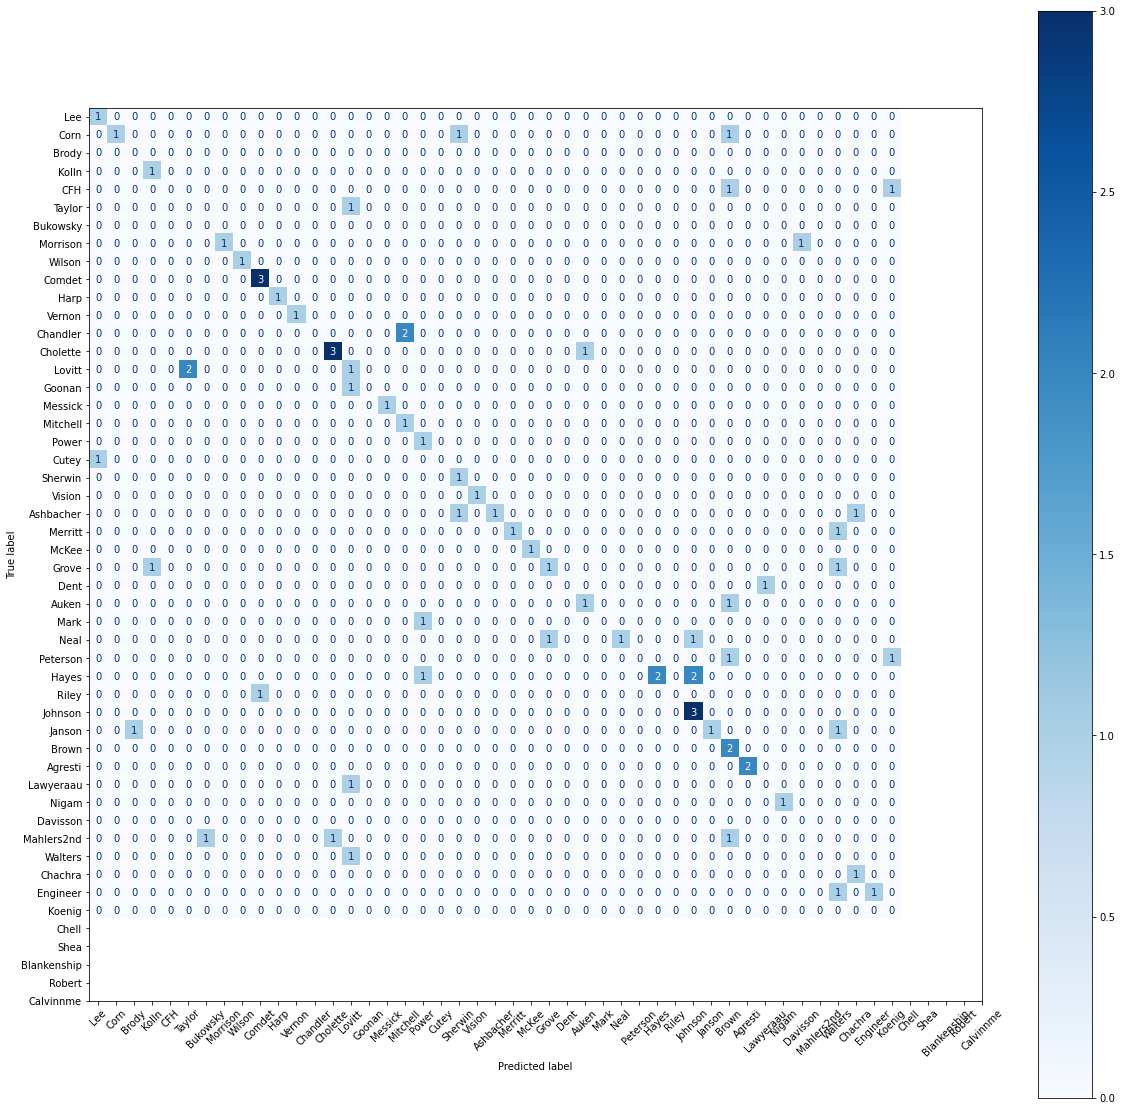

In [110]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(model, np.log(validation_set.iloc[:, 50:8000]+1),validation_set["Class"], ax=ax, cmap='Blues')
tick_marks = np.arange(len(dataset_['Class'].unique()))
plt.xticks(tick_marks, dataset_['Class'].unique(), rotation=45)
plt.yticks(tick_marks, dataset_['Class'].unique())
plt.show()  

# Random forrest

In [30]:
# Random forrest parameters

#Base parameter setting
ccp_alpha = 0
max_leaf = 50
max_depth = 10
n_estimators = 100

In [112]:
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
#accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
for X in X_range:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
    # Append to accuracy_model the accuracy of the model
    accuracy_X.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    
for X in X_range_ln:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
    # Append to accuracy_model the accuracy of the model
    accuracy_X_ln.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_ln.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_ln.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_ln_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_ln_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_ln_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)

RF_Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
RF_Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
RF_Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(RF_Accuracy_matrix).to_csv("Random_forrest__hold_out_accuracy.csv")
pd.DataFrame(RF_Precision_matrix).to_csv("Random_forrest_hold_out_precision.csv")
pd.DataFrame(RF_Recall_matrix).to_csv("Random_forrest_hold_out_recall.csv")

print(pd.DataFrame(RF_Accuracy_matrix).to_latex())
print(pd.DataFrame(RF_Recall_matrix).to_latex())
print(pd.DataFrame(RF_Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &    LN train \\
\midrule
0 &      10000 &   42.222222 &    99.814815 &  43.703704 &   99.814815 \\
1 &       8000 &   39.259259 &    99.814815 &  39.259259 &   99.814815 \\
2 &       6000 &   39.259259 &    99.814815 &  38.518519 &   99.814815 \\
3 &   50:10000 &   37.037037 &    99.814815 &  37.777778 &   99.814815 \\
4 &    50:8000 &   37.777778 &   100.000000 &  36.296296 &  100.000000 \\
5 &    50:6000 &   41.481481 &    99.814815 &  38.518519 &   99.814815 \\
6 &  100:10000 &   37.037037 &    99.629630 &  36.296296 &   99.629630 \\
7 &   100:8000 &   35.555556 &    99.444444 &  34.814815 &   99.444444 \\
8 &   100:6000 &   37.037037 &    99.444444 &  37.777778 &   99.444444 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &    LN train \\
\midrule
0 &      10000 &   41.966667 &    99.846154 &  43.633333 &   99.846154 \\

In [31]:
import warnings
warnings.filterwarnings('ignore')
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
for X in X_range_bin:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
    # Append to accuracy_model the accuracy of the model
    accuracy_X_bin.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_bin.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_bin.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_bin_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_bin_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_bin_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)

RF_HO_Bin_Accuracy_matrix = {'Scenario': X_names,  "Bin test": accuracy_X_bin, "Bin train": accuracy_X_bin_train}
RF_HO_Bin_Recall_matrix = {'Scenario': X_names,  "Bin test": recall_X_bin, "Bin train": recall_X_bin_train}
RF_HO_Bin_Precision_matrix = {'Scenario': X_names,  "Bin test": precision_X_bin, "Bin train": precision_X_bin_train}
pd.DataFrame(RF_HO_Bin_Accuracy_matrix).to_csv("Random_forest__hold_out_bin_accuracy.csv")
pd.DataFrame(RF_HO_Bin_Precision_matrix).to_csv("Random_forest_hold_out_bin_precision.csv")
pd.DataFrame(RF_HO_Bin_Recall_matrix).to_csv("Random_forest_hold_out_binrecall.csv")

print(pd.DataFrame(RF_HO_Bin_Accuracy_matrix).to_latex())
print(pd.DataFrame(RF_HO_Bin_Recall_matrix).to_latex())
print(pd.DataFrame(RF_HO_Bin_Precision_matrix).to_latex())

\begin{tabular}{llrr}
\toprule
{} &   Scenario &  Bin test &  Bin train \\
\midrule
0 &      10000 &  4.098361 &  99.383984 \\
1 &       8000 &  3.278689 &  99.178645 \\
2 &       6000 &  0.000000 &  99.383984 \\
3 &   50:10000 &  2.459016 &  98.973306 \\
4 &    50:8000 &  2.459016 &  99.383984 \\
5 &    50:6000 &  3.278689 &  99.589322 \\
6 &  100:10000 &  3.278689 &  98.357290 \\
7 &   100:8000 &  3.278689 &  99.178645 \\
8 &   100:6000 &  2.459016 &  99.383984 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &   Scenario &  Bin test &  Bin train \\
\midrule
0 &      10000 &  4.333333 &  99.083333 \\
1 &       8000 &  2.500000 &  99.157143 \\
2 &       6000 &  0.000000 &  99.300000 \\
3 &   50:10000 &  2.040816 &  98.699134 \\
4 &    50:8000 &  3.333333 &  99.318182 \\
5 &    50:6000 &  2.500000 &  99.500000 \\
6 &  100:10000 &  2.500000 &  98.075325 \\
7 &   100:8000 &  2.500000 &  98.966667 \\
8 &   100:6000 &  3.666667 &  99.300000 \\
\bottomrule
\end{tabular}

\beg

In [113]:
#Random forrest  with cross validation
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

for X in X_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))



for X in X_range_ln:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []

    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model =create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X_ln.append(np.mean(accuracy_model))
    precision_X_ln.append(np.mean(precision_model))
    recall_X_ln.append(np.mean(recall_model))
    accuracy_X_ln_train.append(np.mean(accuracy_model_train))
    precision_X_ln_train.append(np.mean(precision_model_train))
    recall_X_ln_train.append(np.mean(recall_model_train))

RF_CV_Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
RF_CV_Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
RF_CV_Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(RF_CV_Accuracy_matrix).to_csv("Random_forrest_CV_accuracy.csv")
pd.DataFrame(RF_CV_Precision_matrix).to_csv("Random_forres_CV_precision.csv")
pd.DataFrame(RF_CV_Recall_matrix).to_csv("Random_forres_CV_recall.csv")


print(pd.DataFrame(RF_CV_Accuracy_matrix).to_latex())
print(pd.DataFrame(RF_CV_Recall_matrix).to_latex())
print(pd.DataFrame(RF_CV_Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &   LN train \\
\midrule
0 &      10000 &   46.222564 &    99.703812 &  46.808604 &  99.720259 \\
1 &       8000 &   48.432836 &    99.703731 &  49.174715 &  99.736652 \\
2 &       6000 &   46.804214 &    99.868340 &  47.098332 &  99.851892 \\
3 &   50:10000 &   47.245391 &    99.325143 &  47.396839 &  99.341618 \\
4 &    50:8000 &   45.037313 &    99.489644 &  45.041703 &  99.506145 \\
5 &    50:6000 &   46.661545 &    99.720286 &  47.695347 &  99.720286 \\
6 &  100:10000 &   45.610184 &    99.193429 &  46.341089 &  99.176954 \\
7 &   100:8000 &   46.501317 &    99.226215 &  46.652766 &  99.226215 \\
8 &   100:6000 &   44.721247 &    99.374404 &  44.725637 &  99.374404 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &   LN train \\
\midrule
0 &      10000 &   41.237403 &    99.624832 &  41.886789 &  99.644832 \\
1 &       8

In [115]:
#Random forrest with cross validation N-estimators
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
n_estimator_range = [1,5,10,50,70, 100, 200]

X = np.log(dataset.iloc[:, :8000]+1)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for n_estimators in n_estimator_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
RF_Accuracy_matrix_n_estimators = {'Scenario': n_estimator_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_n_estimators = {'Scenario': n_estimator_range, "Basic test": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_n_estimators = {'Scenario': n_estimator_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(RF_Accuracy_matrix_n_estimators).to_csv("Random_forrest_CV_n_estimators_accuracy.csv")
pd.DataFrame(RF_Precision_matrix_n_estimators).to_csv("Random_forrest_CV_n_estimators_precision.csv")
pd.DataFrame(RF_Recall_matrix_n_estimators).to_csv("Random_forrest_CV_n_estimators_recall.csv")

print(pd.DataFrame(RF_Accuracy_matrix_n_estimators).to_latex())
print(pd.DataFrame(RF_Recall_matrix_n_estimators).to_latex())
print(pd.DataFrame(RF_Precision_matrix_n_estimators).to_latex())



\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         1 &    9.629061 &    22.815616 \\
1 &         5 &   23.977173 &    58.107631 \\
2 &        10 &   27.985075 &    75.490170 \\
3 &        50 &   41.172081 &    98.765364 \\
4 &        70 &   45.017559 &    99.357957 \\
5 &       100 &   49.174715 &    99.736652 \\
6 &       200 &   52.890694 &    99.917682 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         1 &    9.478924 &    21.631345 \\
1 &         5 &   21.875920 &    56.715044 \\
2 &        10 &   25.280116 &    74.316772 \\
3 &        50 &   37.804550 &    98.563978 \\
4 &        70 &   41.601230 &    99.204340 \\
5 &       100 &   45.166085 &    99.645171 \\
6 &       200 &   49.685366 &    99.900779 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         1 &    6.469256 &    39.53003

In [117]:
#Random forrest with cross validation Max_leaf
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
max_leaf_range = [5,10, 20, 50, 100]
n_estimators=200

X = np.log(dataset.iloc[:, :8000]+1)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for max_leaf in max_leaf_range:
    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
RF_Accuracy_matrix_max_leaf = {'Scenario': max_leaf_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_max_leaf = {'Scenario': max_leaf_range, "Basic test": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_max_leaf = {'Scenario': max_leaf_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(RF_Accuracy_matrix_max_leaf).to_csv("Random_forrest_CV_max_leaf_accuracy.csv")
pd.DataFrame(RF_Precision_matrix_max_leaf).to_csv("Random_forrest_CV_max_leaf_precision.csv")
pd.DataFrame(RF_Recall_matrix_max_leaf).to_csv("Random_forrest_CV_max_leaf_recall.csv")

print(pd.DataFrame(RF_Accuracy_matrix_max_leaf).to_latex())
print(pd.DataFrame(RF_Precision_matrix_max_leaf).to_latex())
print(pd.DataFrame(RF_Recall_matrix_max_leaf).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         5 &   33.320896 &    62.386928 \\
1 &        10 &   41.180860 &    83.160984 \\
2 &        20 &   49.771730 &    96.658746 \\
3 &        50 &   52.890694 &    99.917682 \\
4 &       100 &   51.251097 &    99.967051 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         5 &   27.177536 &    72.870424 \\
1 &        10 &   34.601267 &    88.698559 \\
2 &        20 &   43.361083 &    97.772439 \\
3 &        50 &   46.044798 &    99.937920 \\
4 &       100 &   45.380010 &    99.976471 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         5 &   33.065188 &    57.776925 \\
1 &        10 &   40.282696 &    79.918441 \\
2 &        20 &   47.032762 &    95.632451 \\
3 &        50 &   49.685366 &    99.900779 \\
4 &       100 &   48.744341 &    99.95142

In [118]:
#Random forrest with cross validation Max_depth
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
max_depth_range = [2, 3, 4, 5, 8, 10, 50 , 100]
max_leaf= 50
n_estimators=200

X = np.log(dataset.iloc[:, :8000]+1)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for max_depth in max_depth_range:
    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
RF_Accuracy_matrix_max_depth = {'Scenario': max_depth_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_max_depth = {'Scenario': max_depth_range, "Basic test": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_max_depth = {'Scenario': max_depth_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(RF_Accuracy_matrix_max_depth).to_csv("Random_forrest_CV_max_depth_accuracy.csv")
pd.DataFrame(RF_Precision_matrix_max_depth).to_csv("Random_forrest_CV_max_depth_precision.csv")
pd.DataFrame(RF_Recall_matrix_max_depth).to_csv("Random_forrest_CV_max_depth_recall.csv")

print(pd.DataFrame(RF_Accuracy_matrix_max_depth).to_latex())
print(pd.DataFrame(RF_Precision_matrix_max_depth).to_latex())
print(pd.DataFrame(RF_Recall_matrix_max_depth).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         2 &   27.249781 &    51.704240 \\
1 &         3 &   32.879719 &    71.210413 \\
2 &         4 &   36.887621 &    84.905191 \\
3 &         5 &   42.952151 &    93.333153 \\
4 &         8 &   48.145303 &    99.670890 \\
5 &        10 &   52.890694 &    99.917682 \\
6 &        50 &   56.009658 &    99.868340 \\
7 &       100 &   56.009658 &    99.868340 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &         2 &   22.583273 &    62.915325 \\
1 &         3 &   27.391096 &    84.439267 \\
2 &         4 &   29.845704 &    91.592465 \\
3 &         5 &   37.015160 &    96.015099 \\
4 &         8 &   40.679426 &    99.758809 \\
5 &        10 &   46.044798 &    99.937920 \\
6 &        50 &   49.928684 &    99.899844 \\
7 &       100 &   49.928684 &    99.899844 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} & 

In [122]:
ccp_alphas = [ 15e-6, 2e-5, 1e-4, 2e-4, 1e-3, 1, 10]

#Random forrest with cross validation CCP alpha
import warnings
warnings.filterwarnings('ignore')

accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
ccp_alpha_range = [1e-5, 2e-5, 1e-4, 2e-4, 1e-3, 5e-3, 75e-4,  1e-2]
n_estimators=200
max_leaf= 50
max_depth= 50

X = np.log(dataset.iloc[:, :8000]+1)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)
for ccp_alpha in ccp_alpha_range:
    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
RF_Accuracy_matrix_ccp_alpha = {'Scenario': ccp_alpha_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_ccp_alpha  = {'Scenario': ccp_alpha_range, "Basic test": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_ccp_alpha  = {'Scenario': ccp_alpha_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(RF_Accuracy_matrix_ccp_alpha ).to_csv("Random_forrest_CV_max_depth_accuracy.csv")
pd.DataFrame(RF_Precision_matrix_ccp_alpha ).to_csv("Random_forrest_CV_max_depth_precision.csv")
pd.DataFrame(RF_Recall_matrix_ccp_alpha ).to_csv("Random_forrest_CV_max_depth_recall.csv")

print(pd.DataFrame(RF_Accuracy_matrix_ccp_alpha ).to_latex())
print(pd.DataFrame(RF_Precision_matrix_ccp_alpha ).to_latex())
print(pd.DataFrame(RF_Recall_matrix_ccp_alpha ).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &   0.00001 &   56.009658 &    99.868340 \\
1 &   0.00002 &   56.009658 &    99.868340 \\
2 &   0.00010 &   56.009658 &    99.868340 \\
3 &   0.00020 &   56.009658 &    99.868340 \\
4 &   0.00100 &   56.009658 &    99.868340 \\
5 &   0.00500 &   56.009658 &    99.868340 \\
6 &   0.00750 &   51.558385 &    98.008351 \\
7 &   0.01000 &   39.708077 &    73.959101 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &   0.00001 &   49.928684 &    99.899844 \\
1 &   0.00002 &   49.928684 &    99.899844 \\
2 &   0.00010 &   49.928684 &    99.899844 \\
3 &   0.00020 &   49.928684 &    99.899844 \\
4 &   0.00100 &   49.928684 &    99.899844 \\
5 &   0.00500 &   49.928684 &    99.899844 \\
6 &   0.00750 &   45.875004 &    98.573701 \\
7 &   0.01000 &   32.529915 &    81.495665 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} & 

In [14]:
# test of different preprocessing methods with the optimal parameters 
import warnings
warnings.filterwarnings('ignore')

X = np.log(dataset.iloc[:, :8000]+1)
param_grid = {'ccp_alpha': [ 1e-3, 5e-3, 75e-4,  1e-2],  
              'max_leaf': [5,10, 25, 50, 75, 100],
              'max_depth':[ 10, 25, 50 ,75, 100],
              'N_estimators':[75, 100, 125, 150, 175, 200, 225, 250]} 


        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        HalvingGridSearchCV = (create_rnd_forrest(), **params, random_state=42)
         param_grid = {'kernel': ('linear', 'rbf'),
...               'C': [1, 10, 100]}
>>> base_estimator = SVC(gamma='scale')
>>> X, y = make_classification(n_samples=1000)
>>> sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
...                          factor=2, max_resources=40,
...                          aggressive_elimination=False).fit(X, y)
>>> sh.n_resources_
[20, 40]
>>> sh.n_candidates_
[6, 3]
        # Append to accuracy_model the accuracy of the model
        #accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        #precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        #recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        #accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        #precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        #recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    #precision_X.append(np.mean(precision_model))
    #recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    #precision_X_train.append(np.mean(precision_model_train))
    #recall_X_train.append(np.mean(recall_model_train))
    
RF_Accuracy_matrix_ccp_alpha = {'Scenario': list(grid), "Basic test": accuracy_X, "Basic train": accuracy_X_train}
RF_Recall_matrix_ccp_alpha  = {'Scenario': list(grid), "Basic test": recall_X, "Basic train": recall_X_train}
RF_Precision_matrix_ccp_alpha  = {'Scenario': list(grid), "Basic test": precision_X, "Basic train": precision_X_train}
#pd.DataFrame(RF_Accuracy_matrix_ccp_alpha ).to_csv("Random_forrest_CV_max_depth_accuracy.csv")
#pd.DataFrame(RF_Precision_matrix_ccp_alpha ).to_csv("Random_forrest_CV_max_depth_precision.csv")
#pd.DataFrame(RF_Recall_matrix_ccp_alpha ).to_csv("Random_forrest_CV_max_depth_recall.csv")
        
    


TypeError: create_rnd_forrest() argument after ** must be a mapping, not str

In [137]:
import warnings
warnings.filterwarnings('ignore')
accuracy_model=[]
X = np.log(dataset.iloc[:, :8000]+1)
ccp_alpha = 5e-3
max_leaf = 50
max_depth = 50
n_estimators = 200
model = create_rnd_forrest(X, dataset["Class"], ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 0:8000]+1)), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 0:8000]+1)), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 0:8000]+1)), average="macro") * 100)
#accuracy_X=(np.mean(accuracy_model))
print(accuracy_model)
print(precision_model)
print(recall_model)
#print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

58.666666666666664
56.060606060606055
54.848484848484844


In [9]:
import warnings
warnings.filterwarnings('ignore')
accuracy_model=[]
X = np.log(dataset.iloc[:,100 :4500]+1)
ccp_alpha = 5e-3
max_leaf = 50
max_depth = 50
n_estimators = 200
model = create_rnd_forrest(X, dataset["Class"], ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 100:4500]+1)), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 100:4500]+1)), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(np.log(validation_set.iloc[:, 100:4500]+1)), average="macro") * 100)
#accuracy_X=(np.mean(accuracy_model))
print(accuracy_model)
print(precision_model)
print(recall_model)
#print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

54.666666666666664
46.6304347826087
49.275362318840585


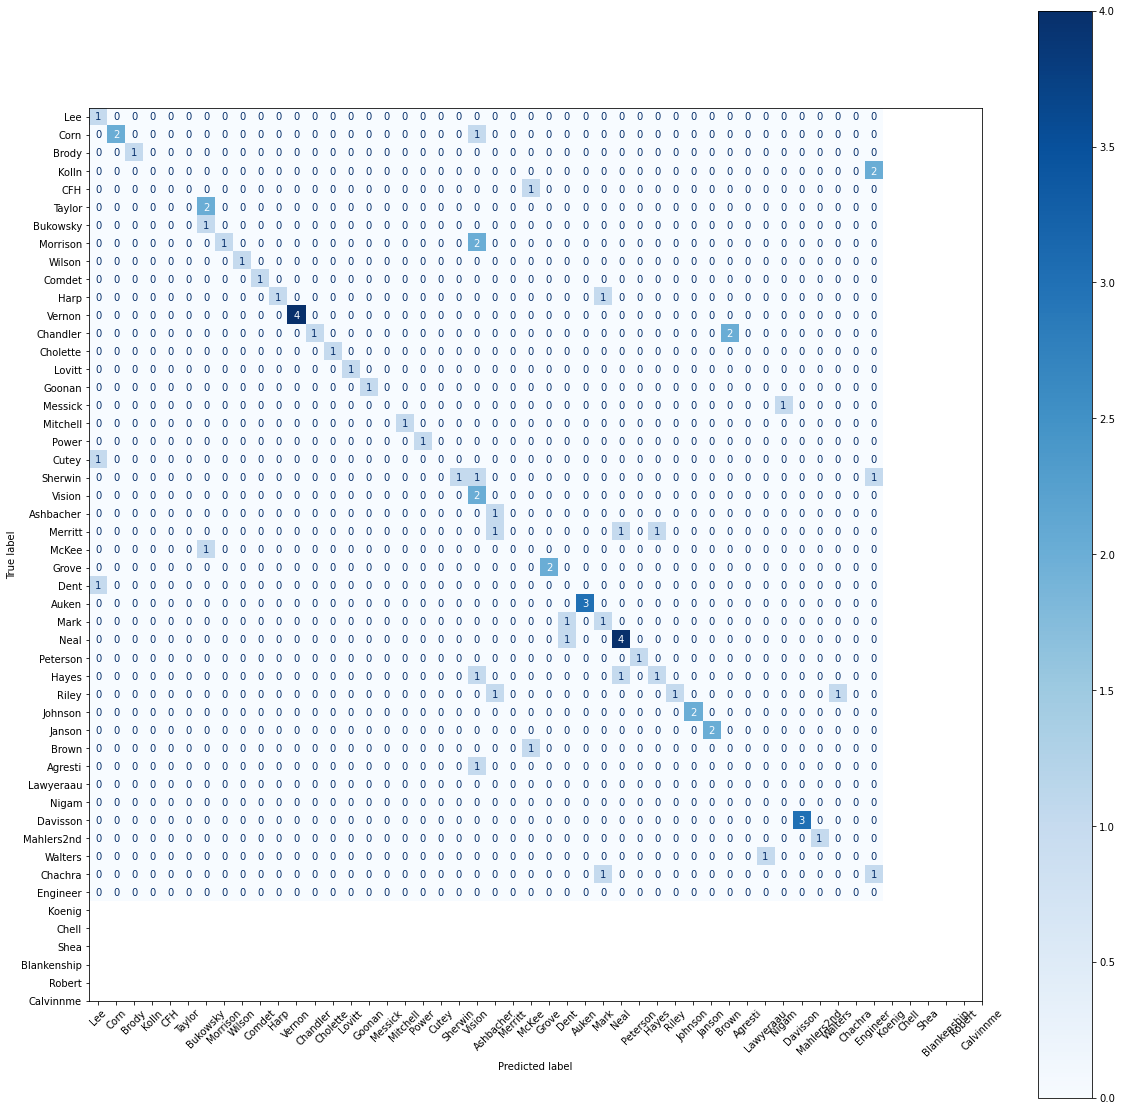

In [140]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(model, np.log(validation_set.iloc[:, 0:8000]+1),validation_set["Class"], ax=ax, cmap='Blues')
tick_marks = np.arange(len(dataset_['Class'].unique()))
plt.xticks(tick_marks, dataset_['Class'].unique(), rotation=45)
plt.yticks(tick_marks, dataset_['Class'].unique())
plt.show() 

# Naive Bayes

In [42]:
#Naive Bayes base parameters
alpha = 1
X_names_2=["100:5500", "100:5000", "100:4500", "100:4000", "100:3500"]
X_range_2 = [dataset.iloc[:, 100:5500], dataset.iloc[:, 100:5000], dataset.iloc[:, 100:4500], dataset.iloc[:, 100:4000], dataset.iloc[:, 100:3500]]
X_names_3=["150:4500", "200:4500", "250:4500", "300:4500", "350:4500", "150:4000", "200:4000", "250:4000", "300:4000", "350:4000"]
X_range_3 = [dataset.iloc[:, 150:4500], dataset.iloc[:, 200:4500], dataset.iloc[:, 250:4500], dataset.iloc[:, 300:4500], dataset.iloc[:, 350:4500], dataset.iloc[:, 150:4000], dataset.iloc[:, 200:4000], dataset.iloc[:, 250:4000], dataset.iloc[:, 300:4000], dataset.iloc[:, 350:4000]]
X_names_4=["200:5500", "200:5000", "200:4500", "200:4000", "200:3500"]
X_range_4 = [dataset.iloc[:, 200:5500], dataset.iloc[:, 200:5000], dataset.iloc[:, 200:4500], dataset.iloc[:, 200:4000], dataset.iloc[:, 200:3500]]

In [43]:
#Perceptron with hold out
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []
#accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
for X in X_range:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_nb(X_train, y_train, alpha)
    # Append to accuracy_model the accuracy of the model
    accuracy_X.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    
for X in X_range_ln:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_nb(X_train, y_train, alpha)
    # Append to accuracy_model the accuracy of the model
    accuracy_X_ln.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_ln.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_ln.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_ln_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_ln_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_ln_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)

NB_Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
NB_Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
NB_Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(NB_Accuracy_matrix).to_csv("Naive_Bayes__hold_out_accuracy.csv")
pd.DataFrame(NB_Precision_matrix).to_csv("Naive_Bayes_hold_out_precision.csv")
pd.DataFrame(NB_Recall_matrix).to_csv("Naive_Bayes_hold_out_recall.csv")

print(pd.DataFrame(NB_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_Recall_matrix).to_latex())
print(pd.DataFrame(NB_Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &    LN train \\
\midrule
0 &      10000 &   35.555556 &    99.074074 &  23.703704 &   95.925926 \\
1 &       8000 &   41.481481 &    99.814815 &  30.370370 &   99.074074 \\
2 &       6000 &   47.407407 &    99.814815 &  41.481481 &  100.000000 \\
3 &   50:10000 &   38.518519 &    99.629630 &  25.925926 &   96.481481 \\
4 &    50:8000 &   42.222222 &    99.814815 &  31.851852 &   99.444444 \\
5 &    50:6000 &   48.148148 &    99.814815 &  41.481481 &  100.000000 \\
6 &  100:10000 &   39.259259 &    99.814815 &  25.925926 &   98.148148 \\
7 &   100:8000 &   41.481481 &    99.814815 &  33.333333 &   99.814815 \\
8 &   100:6000 &   48.888889 &    99.814815 &  41.481481 &  100.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &    LN train \\
\midrule
0 &      10000 &   40.340136 &    98.698413 &  28.400000 &   92.955556 \\

In [55]:
print(pd.DataFrame(list(NB_Accuracy_matrix.items())).iloc[:,0])

0       Scenario
1     Basic test
2    Basic train
3        LN test
4       LN train
Name: 0, dtype: object


In [48]:
plt.semilogx(NB_Accuracy_matrix.items, accuracy_X,"o-")
plt.semilogx(NB_Accuracy_matrix.items, accuracy_X_train,"o-")
plt.semilogx(NB_Accuracy_matrix.items, accuracy_X_ln,"o-")
plt.semilogx(NB_Accuracy_matrix.items, accuracy_X_ln_train,"o-")

AttributeError: 'dict' object has no attribute 'iloc'

In [38]:
import warnings
warnings.filterwarnings('ignore')
accuracy_X_bin ,recall_X_bin,  precision_X_bin,  accuracy_X_bin_train, recall_X_bin_train, precision_X_bin_train =  [], [], [],[], [], []
for X in X_range_bin:
    X_target=pd.concat([X, dataset["Class"]], axis=1, join='inner')
    train_set, test_set = train_test_split(X_target, test_size=0.2, random_state=42, shuffle=True)
    X_test = test_set.iloc[:,:-1]
    y_test = test_set["Class"]
    X_train = train_set.iloc[:,:-1]
    y_train =train_set["Class"]
    
    model = create_rnd_forrest(X_train, y_train, ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
    # Append to accuracy_model the accuracy of the model
    accuracy_X_bin.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
    precision_X_bin.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
    recall_X_bin.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
    accuracy_X_bin_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
    precision_X_bin_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
    recall_X_bin_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)

NB_HO_Bin_Accuracy_matrix = {'Scenario': X_names,  "Bin test": accuracy_X_bin, "Bin train": accuracy_X_bin_train}
NB_HO_Bin_Recall_matrix = {'Scenario': X_names,  "Bin test": recall_X_bin, "Bin train": recall_X_bin_train}
NB_HO_Bin_Precision_matrix = {'Scenario': X_names,  "Bin test": precision_X_bin, "Bin train": precision_X_bin_train}
pd.DataFrame(NB_HO_Bin_Accuracy_matrix).to_csv("Naive Bayes__hold_out_bin_accuracy.csv")
pd.DataFrame(NB_HO_Bin_Precision_matrix).to_csv("Naive_Bayes_hold_out_bin_precision.csv")
pd.DataFrame(NB_HO_Bin_Recall_matrix).to_csv("Naive_Bayes_hold_out_binrecall.csv")

print(pd.DataFrame(NB_HO_Bin_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_HO_Bin_Recall_matrix).to_latex())
print(pd.DataFrame(NB_HO_Bin_Precision_matrix).to_latex())

\begin{tabular}{llrr}
\toprule
{} &   Scenario &   Bin test &   Bin train \\
\midrule
0 &      10000 &  51.851852 &   99.814815 \\
1 &       8000 &  45.925926 &  100.000000 \\
2 &       6000 &  48.148148 &  100.000000 \\
3 &   50:10000 &  46.666667 &  100.000000 \\
4 &    50:8000 &  45.925926 &  100.000000 \\
5 &    50:6000 &  45.925926 &  100.000000 \\
6 &  100:10000 &  47.407407 &  100.000000 \\
7 &   100:8000 &  47.407407 &   99.814815 \\
8 &   100:6000 &  41.481481 &  100.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &   Scenario &   Bin test &   Bin train \\
\midrule
0 &      10000 &  53.933333 &   99.800000 \\
1 &       8000 &  46.933333 &  100.000000 \\
2 &       6000 &  50.366667 &  100.000000 \\
3 &   50:10000 &  48.700000 &  100.000000 \\
4 &    50:8000 &  47.700000 &  100.000000 \\
5 &    50:6000 &  47.766667 &  100.000000 \\
6 &  100:10000 &  51.000000 &  100.000000 \\
7 &   100:8000 &  53.366667 &   99.777778 \\
8 &   100:6000 &  44.333333 &  100.0

In [129]:
#Perceptron with cross validation
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

for X in X_range:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))



for X in X_range_ln:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []

    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X_ln.append(np.mean(accuracy_model))
    precision_X_ln.append(np.mean(precision_model))
    recall_X_ln.append(np.mean(recall_model))
    accuracy_X_ln_train.append(np.mean(accuracy_model_train))
    precision_X_ln_train.append(np.mean(precision_model_train))
    recall_X_ln_train.append(np.mean(recall_model_train))

NB_CV_Accuracy_matrix = {'Scenario': X_names, "Basic test": accuracy_X, "Basic train": accuracy_X_train, "LN test": accuracy_X_ln, "LN train": accuracy_X_ln_train}
NB_CV_Recall_matrix = {'Scenario': X_names, "Basic test": recall_X, "Basic train": recall_X_train, "LN test": recall_X_ln, "LN train": recall_X_ln_train}
NB_CV_Precision_matrix = {'Scenario': X_names, "Basic test": precision_X, "Basic train": precision_X_train, "LN test": precision_X_ln, "LN train": precision_X_ln_train}
pd.DataFrame(NB_CV_Accuracy_matrix).to_csv("Naive_Bayes_CV_accuracy.csv")
pd.DataFrame(NB_CV_Precision_matrix).to_csv("Naive_Bayes_CV_precision.csv")
pd.DataFrame(NB_CV_Recall_matrix).to_csv("Naive_Bayes_CV_recall.csv")

print(pd.DataFrame(NB_CV_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_CV_Recall_matrix).to_latex())
print(pd.DataFrame(NB_CV_Precision_matrix).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &    LN train \\
\midrule
0 &      10000 &   46.962248 &    99.308669 &  34.207638 &   97.958846 \\
1 &       8000 &   52.153205 &    99.835472 &  42.811677 &   99.407515 \\
2 &       6000 &   56.150132 &    99.851838 &  51.850307 &  100.000000 \\
3 &   50:10000 &   48.737928 &    99.637914 &  34.800263 &   98.452701 \\
4 &    50:8000 &   53.336260 &    99.884841 &  43.996927 &   99.654361 \\
5 &    50:6000 &   57.631694 &    99.868313 &  51.999561 &  100.000000 \\
6 &  100:10000 &   49.633450 &    99.687283 &  35.399473 &   98.666625 \\
7 &   100:8000 &   53.336260 &    99.917736 &  44.143986 &   99.703758 \\
8 &   100:6000 &   57.928007 &    99.934156 &  52.892888 &  100.000000 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &   Scenario &  Basic test &  Basic train &    LN test &    LN train \\
\midrule
0 &      10000 &   44.479086 &    98.917781 &  34.211819 &   96.702364 \\

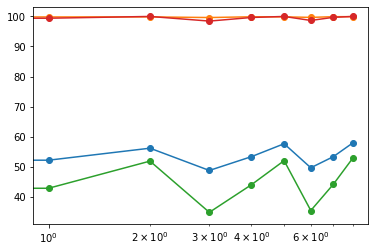

In [130]:
plt.semilogx(X_names, accuracy_X,"o-")
plt.semilogx(X_names, accuracy_X_train,"o-")
plt.semilogx(X_names, accuracy_X_ln,"o-")
plt.semilogx(X_names, accuracy_X_ln_train,"o-")

In [131]:
#Learning rate 
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

alpha_range=[1e-3, 1e-2, 1e-1, 0.5, 1, 10, 100, 1000]
X = dataset.iloc[:,100:6000]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(X)

for alpha in alpha_range:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))
    
NB_Alpha_Accuracy_matrix = {'Scenario': alpha_range, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
NB_Alpha_Recall_matrix = {'Scenario': alpha_range, "Basic test": recall_X, "Basic train": recall_X_train}
NB_Alpha_Precision_matrix = {'Scenario': alpha_range, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(NB_Alpha_Accuracy_matrix).to_csv("Naive_Bayes_CV_alpha_accuracy.csv")
pd.DataFrame(NB_Alpha_Precision_matrix).to_csv("Naive_Bayes_Perceptron_CV_alpha_precision.csv")
pd.DataFrame(NB_Alpha_Recall_matrix).to_csv("Naive_Bayes_CV_alpha_recall.csv")

print(pd.DataFrame(NB_Alpha_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_Alpha_Recall_matrix).to_latex())
print(pd.DataFrame(NB_Alpha_Precision_matrix).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &     0.001 &   57.928007 &    99.934156 \\
1 &     0.010 &   57.928007 &    99.934156 \\
2 &     0.100 &   57.928007 &    99.934156 \\
3 &     0.500 &   57.928007 &    99.934156 \\
4 &     1.000 &   57.928007 &    99.934156 \\
5 &    10.000 &   57.928007 &    99.934156 \\
6 &   100.000 &   57.928007 &    99.934156 \\
7 &  1000.000 &   57.928007 &    99.934156 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &     0.001 &   53.294025 &    99.937179 \\
1 &     0.010 &   53.294025 &    99.937179 \\
2 &     0.100 &   53.294025 &    99.937179 \\
3 &     0.500 &   53.294025 &    99.937179 \\
4 &     1.000 &   53.294025 &    99.937179 \\
5 &    10.000 &   53.294025 &    99.937179 \\
6 &   100.000 &   53.294025 &    99.937179 \\
7 &  1000.000 &   53.294025 &    99.937179 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} & 

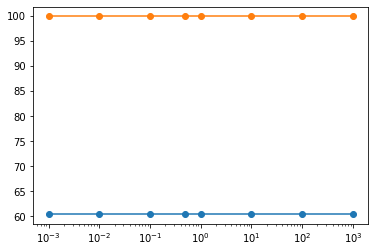

In [69]:
plt.semilogx(alpha_range, accuracy_X,"o-")
plt.semilogx(alpha_range, accuracy_X_train,"o-")

In [192]:
#Perceptron with cross validation
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

for X in X_range_2:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))


NB_CV_2_Accuracy_matrix = {'Scenario': X_names_2, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
NB_CV_2_Recall_matrix = {'Scenario': X_names_2, "Basic test": recall_X, "Basic train": recall_X_train}
NB_CV_2_Precision_matrix = {'Scenario': X_names_2, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(NB_CV_2_Accuracy_matrix).to_csv("Naive_Bayes_CV_2_accuracy.csv")
pd.DataFrame(NB_CV_2_Precision_matrix).to_csv("Naive_Bayes_CV_2_precision.csv")
pd.DataFrame(NB_CV_2_Recall_matrix).to_csv("Naive_Bayes_CV_2_recall.csv")

print(pd.DataFrame(NB_CV_2_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_CV_2_Recall_matrix).to_latex())
print(pd.DataFrame(NB_CV_2_Precision_matrix).to_latex())

\begin{tabular}{llrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &  100:5500 &   58.077261 &    99.934156 \\
1 &  100:5000 &   59.253731 &    99.917709 \\
2 &  100:4500 &   60.144864 &    99.835418 \\
3 &  100:4000 &   60.586040 &    99.786049 \\
4 &  100:3500 &   59.543459 &    99.720178 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &  100:5500 &   53.223080 &    99.937179 \\
1 &  100:5000 &   53.849310 &    99.923846 \\
2 &  100:4500 &   53.896135 &    99.856941 \\
3 &  100:4000 &   54.075094 &    99.810188 \\
4 &  100:3500 &   53.181340 &    99.746622 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &  100:5500 &   50.792076 &    99.942711 \\
1 &  100:5000 &   51.333564 &    99.926044 \\
2 &  100:4500 &   52.006634 &    99.860382 \\
3 &  100:4000 &   52.803348 &    99.817231 \\
4 &  100:3500 &   52.253010 &    99.75692

In [199]:
#Perceptron with cross validation
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

for X in X_range_3:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))


NB_CV_3_Accuracy_matrix = {'Scenario': X_names_3, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
NB_CV_3_Recall_matrix = {'Scenario': X_names_3, "Basic test": recall_X, "Basic train": recall_X_train}
NB_CV_3_Precision_matrix = {'Scenario': X_names_3, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(NB_CV_3_Accuracy_matrix).to_csv("Naive_Bayes_CV_3_accuracy.csv")
pd.DataFrame(NB_CV_3_Precision_matrix).to_csv("Naive_Bayes_CV_3_precision.csv")
pd.DataFrame(NB_CV_3_Recall_matrix).to_csv("Naive_Bayes_CV_3_recall.csv")

print(pd.DataFrame(NB_CV_3_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_CV_3_Recall_matrix).to_latex())
print(pd.DataFrame(NB_CV_3_Precision_matrix).to_latex())

\begin{tabular}{llrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &  150:4500 &   59.995610 &    99.884760 \\
1 &  200:4500 &   59.995610 &    99.950631 \\
2 &  250:4500 &   60.006585 &    99.967105 \\
3 &  300:4500 &   59.411765 &    99.983553 \\
4 &  350:4500 &   59.253731 &    99.983553 \\
5 &  150:4000 &   60.140474 &    99.851838 \\
6 &  200:4000 &   59.846356 &    99.901262 \\
7 &  250:4000 &   59.997805 &    99.901262 \\
8 &  300:4000 &   58.812555 &    99.967078 \\
9 &  350:4000 &   59.407375 &    99.983553 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &  150:4500 &   54.091207 &    99.898013 \\
1 &  200:4500 &   53.788220 &    99.956731 \\
2 &  250:4500 &   54.291187 &    99.969231 \\
3 &  300:4500 &   53.377350 &    99.984615 \\
4 &  350:4500 &   53.173179 &    99.984615 \\
5 &  150:4000 &   53.886744 &    99.871227 \\
6 &  200:4000 &   53.479085 &    99.917564 \\
7 &  250:4000 &  

In [204]:
#Naive Bayes additional scenarios
import warnings
warnings.filterwarnings('ignore')
accuracy_X, accuracy_X_ln ,recall_X, recall_X_ln, precision_X, precision_X_ln, accuracy_X_train, accuracy_X_ln_train, recall_X_train,recall_X_ln_train, precision_X_train, precision_X_ln_train = [], [], [], [], [], [], [], [], [],[], [], []

for X in X_range_4:
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.split(X)

    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list

    accuracy_model, precision_model, recall_model, accuracy_model_train, precision_model_train, recall_model_train = [], [], [], [],[], []
    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model = create_nb(X_train, y_train, alpha)
        # Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True) * 100)
        precision_model.append(precision_score(y_test, model.predict(X_test), average="macro") * 100)
        recall_model.append(recall_score(y_test, model.predict(X_test), average="macro") * 100)
        accuracy_model_train.append(accuracy_score(y_train, model.predict(X_train), normalize=True) * 100)
        precision_model_train.append(precision_score(y_train, model.predict(X_train), average="macro") * 100)
        recall_model_train.append(recall_score(y_train, model.predict(X_train), average="macro") * 100)
    accuracy_X.append(np.mean(accuracy_model))
    precision_X.append(np.mean(precision_model))
    recall_X.append(np.mean(recall_model))
    accuracy_X_train.append(np.mean(accuracy_model_train))
    precision_X_train.append(np.mean(precision_model_train))
    recall_X_train.append(np.mean(recall_model_train))


NB_CV_4_Accuracy_matrix = {'Scenario': X_names_4, "Basic test": accuracy_X, "Basic train": accuracy_X_train}
NB_CV_4_Recall_matrix = {'Scenario': X_names_4, "Basic test": recall_X, "Basic train": recall_X_train}
NB_CV_4_Precision_matrix = {'Scenario': X_names_4, "Basic test": precision_X, "Basic train": precision_X_train}
pd.DataFrame(NB_CV_4_Accuracy_matrix).to_csv("Naive_Bayes_CV_4_accuracy.csv")
pd.DataFrame(NB_CV_4_Precision_matrix).to_csv("Naive_Bayes_CV_4_precision.csv")
pd.DataFrame(NB_CV_4_Recall_matrix).to_csv("Naive_Bayes_CV_4_recall.csv")

print(pd.DataFrame(NB_CV_4_Accuracy_matrix).to_latex())
print(pd.DataFrame(NB_CV_4_Recall_matrix).to_latex())
print(pd.DataFrame(NB_CV_4_Precision_matrix).to_latex())

\begin{tabular}{llrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &  100:5500 &   58.667691 &    99.967105 \\
1 &  200:5000 &   59.558824 &    99.967105 \\
2 &  200:4500 &   59.995610 &    99.950631 \\
3 &  200:4000 &   59.846356 &    99.901262 \\
4 &  200:3500 &   58.808165 &    99.818943 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &  100:5500 &   52.971141 &    99.969231 \\
1 &  200:5000 &   53.285914 &    99.969231 \\
2 &  200:4500 &   53.788220 &    99.956731 \\
3 &  200:4000 &   53.479085 &    99.917564 \\
4 &  200:3500 &   52.377029 &    99.842656 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &  Scenario &  Basic test &  Basic train \\
\midrule
0 &  100:5500 &   51.178599 &    99.970330 \\
1 &  200:5000 &   51.089451 &    99.970330 \\
2 &  200:4500 &   52.663244 &    99.959219 \\
3 &  200:4000 &   52.919725 &    99.914667 \\
4 &  200:3500 &   51.493001 &    99.84371

# Naive Bayes binary dataset

In [23]:
data= np.array(dataset.iloc[:,:10000])
df = pd.DataFrame(data, index=range(data.shape[0]), columns=range(data.shape[1]))

eps = 1
b = np.zeros((df.shape[0], df.shape[1]))
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if df.loc[i,j] < eps:
            b[i,j] = 0
        else:
            b[i,j] = 1
df_bin = pd.DataFrame(b, columns=df.columns, index=df.index)

data_2= np.array(validation_set.iloc[:,:10000])
df_2 = pd.DataFrame(data_2, index=range(data_2.shape[0]), columns=range(data_2.shape[1]))

eps_2 = 1
b_2 = np.zeros((df_2.shape[0], df_2.shape[1]))
for i in range(df_2.shape[0]):
    for j in range(df_2.shape[1]):
        if df_2.loc[i,j] < eps_2:
            b_2[i,j] = 0
        else:
            b_2[i,j] = 1
validation_bin = pd.DataFrame(b_2, columns=df_2.columns, index=df_2.index)



In [24]:
X= df_bin.iloc[:,150:4000]
alpha=0.5
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_bin.iloc[:,150:4000]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_bin.iloc[:,150:4000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_bin.iloc[:,150:4000]), average="macro") * 100)

print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)


Accuracy is 62.66666666666667 precision is: 53.333333333333336 Recall is: 60.92592592592592


In [133]:
X= dataset.iloc[:,100:6000]
alpha=0.5
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:6000]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:6000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:6000]), average="macro") * 100)

print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)


Accuracy is 54.666666666666664 precision is: 50.45454545454545 Recall is: 54.58333333333333


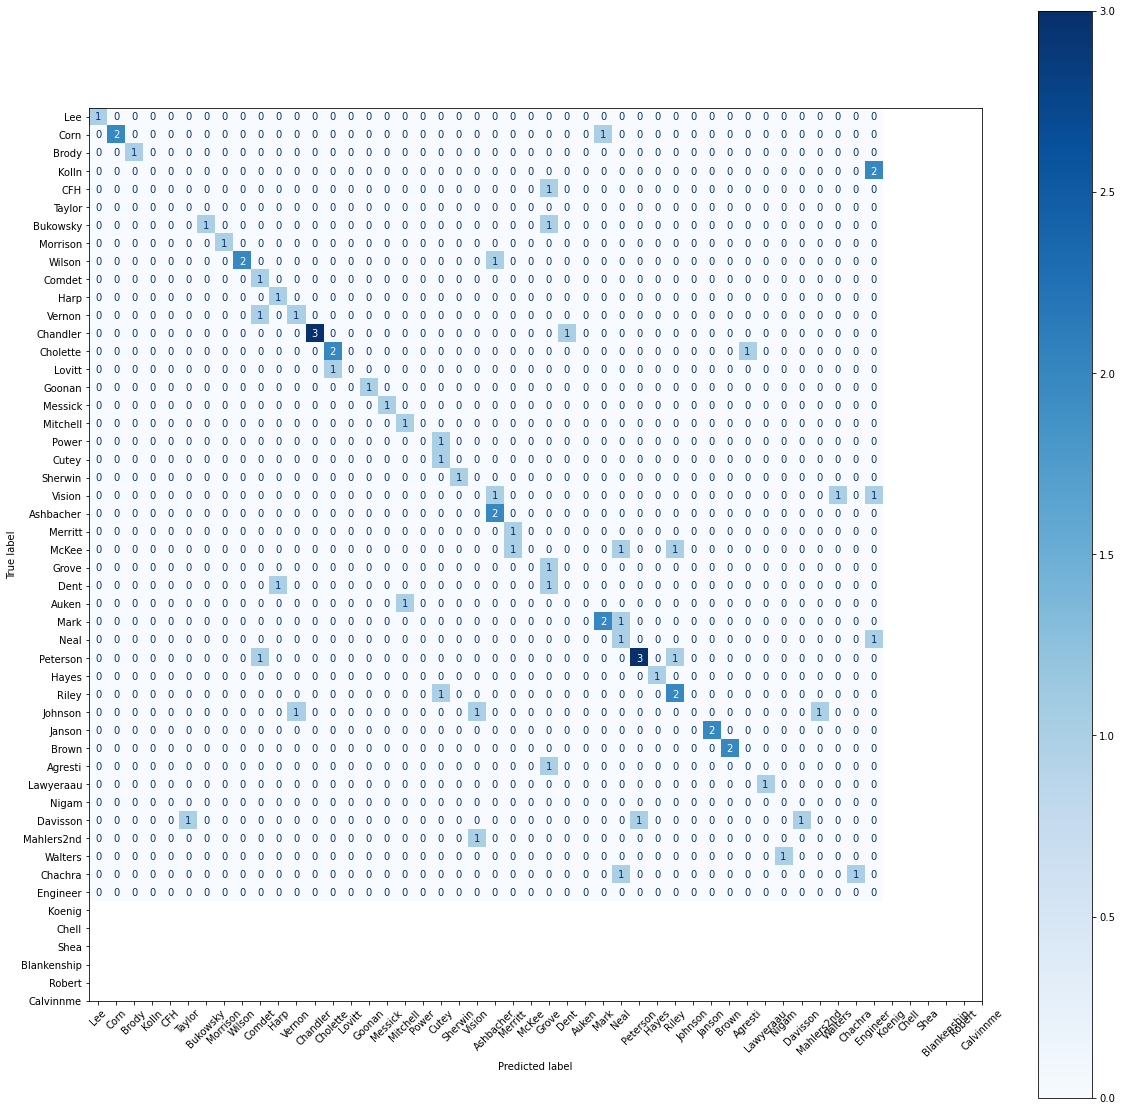

In [134]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(model, validation_set.iloc[:, 100:6000],validation_set["Class"], ax=ax, cmap='Blues')
tick_marks = np.arange(len(dataset_['Class'].unique()))
plt.xticks(tick_marks, dataset_['Class'].unique(), rotation=45)
plt.yticks(tick_marks, dataset_['Class'].unique())
plt.show() 

In [179]:
X= dataset.iloc[:,100:8000]
alpha=0.5
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:8000]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:8000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:8000]), average="macro") * 100)

print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

Accuracy is 52.0 precision is: 46.0 Recall is: 50.037037037037045


In [188]:
X= dataset.iloc[:,200:5500]
alpha=0.05
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:5500]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:5500]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:5500]), average="macro") * 100)

print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

Accuracy is 56.00000000000001 precision is: 52.234848484848484 Recall is: 56.47727272727272


In [189]:
X= dataset.iloc[:,200:5000]
alpha=0.05
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:5000]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:5000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:5000]), average="macro") * 100)

print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

Accuracy is 57.333333333333336 precision is: 54.35606060606061 Recall is: 57.61363636363635


In [186]:
X= dataset.iloc[:,200:7500]
alpha=0.5
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:7500]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:7000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,200:7000]), average="macro") * 100)

print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)


Accuracy is 54.666666666666664 precision is: 46.223698781838316 Recall is: 53.91472868217054


In [200]:
X= dataset.iloc[:,100:4000]
alpha=0.5
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:4000]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:4000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,100:4000]), average="macro") * 100)

print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

Accuracy is 56.00000000000001 precision is: 53.372093023255815 Recall is: 58.178294573643406


In [206]:
X= dataset.iloc[:,250:4500]
alpha=0.5
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,250:4500]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,250:4500]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,250:4500]), average="macro") * 100)

print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

Accuracy is 57.333333333333336 precision is: 54.844961240310084 Recall is: 58.95348837209302


In [11]:
X= dataset.iloc[:,150:4000]
alpha=0.5
model = create_nb(X, dataset["Class"], alpha)
# Append to accuracy_model the accuracy of the model
accuracy_model=(accuracy_score(validation_set["Class"], model.predict(validation_set.iloc[:,150:4000]), normalize=True) * 100)
precision_model=(precision_score(validation_set["Class"], model.predict(validation_set.iloc[:,150:4000]), average="macro") * 100)
recall_model=(recall_score(validation_set["Class"], model.predict(validation_set.iloc[:,150:4000]), average="macro") * 100)

print("Accuracy is", accuracy_model, "precision is:", precision_model, "Recall is:", recall_model)

Accuracy is 58.666666666666664 precision is: 55.370985603543744 Recall is: 59.41860465116279


# Create solution

In [174]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]
X_predict=np.log(amazon_data_solution.iloc[:, :8000]+1)
accuracy_model=[]
X = np.log(dataset_.iloc[:, :8000]+1)
ccp_alpha = 5e-3
max_leaf = 50
max_depth = 50
n_estimators = 200
model = create_rnd_forrest(X, dataset_["Class"], ccp_alpha, max_leaf, max_depth, n_estimators, random_state=42)
model.fit(X, dataset_["Class"])
solution= pd.DataFrame([amazon_data_solution_raw["ID"], model.predict(X_predict)])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("Solution_Random_forest_8000_leaf_50_depth_50_alpha_0005_estimators_200.csv")

In [171]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]

X_predict=amazon_data_solution.iloc[:, 100:6000]
X = dataset_.iloc[:,100:6000]
alpha=0.5
model = create_nb(X, dataset_["Class"], alpha)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("solution_Naive_Bayes_100_6000.csv")

In [176]:
accuracy_model=[]
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]
X_predict=np.log(amazon_data_solution.iloc[:, 50:8000]+1)
X = np.log(dataset_.iloc[:, 50:8000]+1)
model = create_perceptron(X, dataset_["Class"], 0.0002, 1, 'l1', 10, random_state=42)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("Solution_Perceptron_50_8000_max_iter10_penal_l1_alpha_0002_eta_1.csv")



In [184]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]

X_predict=amazon_data_solution.iloc[:, 100:8000]
X = dataset_.iloc[:,100:8000]
alpha=0.5
model = create_nb(X, dataset_["Class"], alpha)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("solution_Naive_Bayes_100_8000.csv")

In [185]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]

X_predict=amazon_data_solution.iloc[:, 150:7000]
X = dataset_.iloc[:,150:7000]
alpha=0.5
model = create_nb(X, dataset_["Class"], alpha)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("solution_Naive_Bayes_150_7000.csv")

In [208]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]

X_predict=amazon_data_solution.iloc[:, 100:4000]
X = dataset_.iloc[:,100:4000]
alpha=0.5
model = create_nb(X, dataset_["Class"], alpha)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("solution_Naive_Bayes_100_4000.csv")

In [209]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]

X_predict=amazon_data_solution.iloc[:, 250:4500]
X = dataset_.iloc[:,250:4500]
alpha=0.5
model = create_nb(X, dataset_["Class"], alpha)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("solution_Naive_Bayes_250_4500.csv")

In [10]:
amazon_data_solution_raw = pd.read_csv("Datasets/amazon_review_ID.shuf.tes.csv")
amazon_data_solution = amazon_data_solution_raw[headers_sort]

X_predict=amazon_data_solution.iloc[:, 150:4000]
X = dataset_.iloc[:,150:4000]
alpha=0.5
model = create_nb(X, dataset_["Class"], alpha)
model.fit(X, dataset_["Class"])
solution_= model.predict(X_predict)
solution_matrix=pd.DataFrame(solution_, index=amazon_data_solution_raw["ID"], columns=["Class"])
solution_matrix.to_csv("solution_Naive_Bayes_150_4000.csv")